In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('gene_expression.csv')

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
df.shape

(3000, 3)

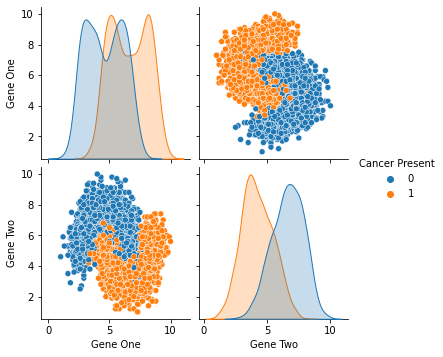

In [7]:
sns.pairplot(data=df,hue='Cancer Present')

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

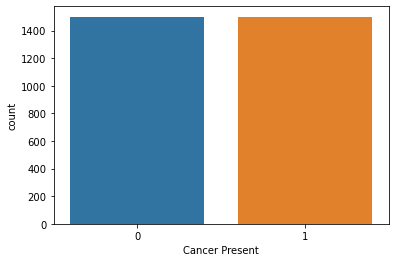

In [14]:
sns.countplot(x='Cancer Present',data=df)

In [15]:
X = df.drop('Cancer Present',axis=1)

In [16]:
y = df['Cancer Present']

In [17]:
from sklearn.model_selection import train_test_split

In [81]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# error_rates = []

# for k in range(1,40):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(scaled_X_train,y_train)
    
#     y_pred = knn_model.predict(scaled_X_test)
#     errors = 1 - accuracy_score(y_test,y_pred)
    
#     error_rates.append(errors)



In [47]:
# knn_model

Text(0, 0.5, 'Error')

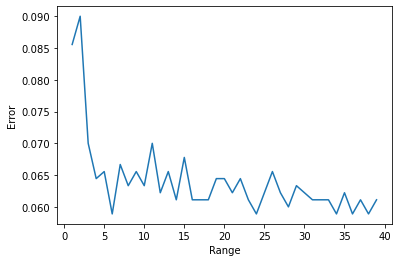

In [50]:
plt.plot(range(1,40),error_rates)
plt.xlabel('Range')
plt.ylabel('Error')

In [51]:
scaler = StandardScaler()

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [58]:
operations = [('scaler',scaler),('knn',knn)]

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline(operations)

In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
k_values = list(range(1,20))

In [65]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [68]:
param_grid = {'knn__n_neighbors':k_values}

In [69]:
#help(knn)

In [70]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [71]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [73]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [76]:
full_pred = full_cv_classifier.predict(X_test)

In [77]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [78]:
new_patient = [[3.8,6.4]]

In [79]:
full_cv_classifier.predict(new_patient)

C:\Users\aarav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [83]:
full_cv_classifier.predict_proba(new_patient)

C:\Users\aarav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.73684211, 0.26315789]])